# Phase-4

## 4.1  "Create 3 clusters as below.



1. Sensitive Area's



2. Moderate Area's



3. Peaceful Area's"



## 4.2  Create DataFrame for each cluster that shows data according to the areas.



## 4.3  "Analyse your clusters and prepare a report that explains all your observations.



## 4.4   Capstone project overall story in your own words. Min 1000 words.



In [134]:
#let's start with importing necessory libarary
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<b>CONSIDERING THE DATABASES THAT CONTAINS THE DISTRICTS !!

In [135]:
district_wise=pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")

In [136]:
district_wise

,STATE/UT,DISTRICT,Year,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


<B> DROPPING SOME COLUMNS WHICH ARE NOT REQUIRED FOR OUR CLUSTERING ANALYSIS!!<BR>

In [137]:
district_wise=district_wise[['STATE/UT',
 'DISTRICT',
 'Year',
 'MURDER',
 'RAPE',
 'KIDNAPPING & ABDUCTION',
 'DACOITY',
 'ROBBERY',
 'BURGLARY',
 'RIOTS',
 'COUNTERFIETING',
 'ARSON',
 'HURT/GREVIOUS HURT']]

In [138]:
for i in range(len(district_wise['STATE/UT'])):
    if(district_wise['STATE/UT'][i]=='DELHI UT'):
        district_wise['STATE/UT'][i]='DELHI'
        

In [139]:
district_wise['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [140]:
district_wise=district_wise[district_wise['DISTRICT']!='TOTAL']

In [141]:
districtwise_sc=pd.read_csv("02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")

In [142]:
districtwise_sc['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [143]:
districtwise_sc['TOTAL CRIMES AGAINST SC']=districtwise_sc.iloc[:,3:].sum(axis=1)

In [144]:
districtwise_sctot=districtwise_sc[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST SC']]

In [145]:
districtwise_sctot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST SC
0,ANDHRA PRADESH,ADILABAD,2001,55
1,ANDHRA PRADESH,ANANTAPUR,2001,127
2,ANDHRA PRADESH,CHITTOOR,2001,114
3,ANDHRA PRADESH,CUDDAPAH,2001,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,89
...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9014,LAKSHADWEEP,TOTAL,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,1
9016,PUDUCHERRY,PUDUCHERRY,2012,23


In [146]:
districtwise_sctot=districtwise_sctot[districtwise_sctot['DISTRICT']!='TOTAL']

In [147]:
districtwise_st=pd.read_csv("02_District_wise_crimes_committed_against_ST_2001_2012.csv")

In [148]:
districtwise_st['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [149]:
districtwise_st=districtwise_st[districtwise_st['DISTRICT']!='TOTAL']

In [150]:
districtwise_st['TOTAL CRIMES AGAINST ST']=districtwise_st.iloc[:,3:].sum(axis=1)

In [151]:
districtwise_sttot=districtwise_st[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST ST']]

In [152]:
districtwise_sttot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST ST
0,ANDHRA PRADESH,ADILABAD,2001,18
1,ANDHRA PRADESH,ANANTAPUR,2001,14
2,ANDHRA PRADESH,CHITTOOR,2001,2
3,ANDHRA PRADESH,CUDDAPAH,2001,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,14
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,0


In [153]:
districtwise_child=pd.read_csv("03_District_wise_crimes_committed_against_children_2001_2012.csv")

In [154]:
districtwise_child['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [155]:
districtwise_child=districtwise_child[districtwise_child['DISTRICT']!='TOTAL']

In [156]:
districtwise_child.rename(columns={"Total":"TOTAL CRIMES AGAINST CHILDREN"},inplace=True)

In [157]:
districtwise_child.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes',
       'TOTAL CRIMES AGAINST CHILDREN'],
      dtype='object')

In [158]:
districtwise_childtot=districtwise_child[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST CHILDREN']]

In [159]:
districtwise_childtot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,0
1,ANDHRA PRADESH,ANANTAPUR,2001,66
2,ANDHRA PRADESH,CHITTOOR,2001,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0
...,...,...,...,...
9007,DELHI,STF,2012,0
9008,DELHI,WEST,2012,542
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0
9012,PUDUCHERRY,KARAIKAL,2012,7


In [160]:
districtwise_women=pd.read_csv("42_District_wise_crimes_committed_against_women_2001_2012.csv")

In [161]:
districtwise_women['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [162]:
districtwise_women=districtwise_women[districtwise_women['DISTRICT']!='TOTAL']

In [163]:
districtwise_women['TOTAL CRIMES AGAINST WOMEN']=districtwise_women.iloc[:,3:].sum(axis=1)

In [164]:
districtwise_womentot=districtwise_women[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST WOMEN']]

In [165]:
districtwise_womentot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,454
1,ANDHRA PRADESH,ANANTAPUR,2001,356
2,ANDHRA PRADESH,CHITTOOR,2001,456
3,ANDHRA PRADESH,CUDDAPAH,2001,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,475
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,739
9012,LAKSHADWEEP,LAKSHADWEEP,2012,2
9014,PUDUCHERRY,KARAIKAL,2012,11


<B> MERGING THE ABOVE DATASETS!!<BR>

In [166]:
cluster=pd.merge(district_wise,districtwise_sctot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_sttot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_childtot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_womentot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year'])

<B> GROUPING BY STATE/UT,DISTRICT AND SUMMING ALL THE CRIMES OVER THE YEARS!!

In [167]:
cluster=cluster.groupby(['STATE/UT','DISTRICT']).sum().reset_index().drop(['Year'],axis=1)

In [168]:
cluster

,STATE/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,15,3,12,5,9,90,17,1,11,99,0,1,10,54
1,A & N ISLANDS,ANDAMAN,118,92,73,4,63,708,115,9,80,910,0,33,206,458
2,A & N ISLANDS,CAR,2,0,1,1,0,0,0,0,0,4,0,0,2,2
3,A & N ISLANDS,NICOBAR,12,2,1,1,0,23,0,0,3,34,0,3,1,11
4,A & N ISLANDS,NORTH,5,4,0,0,1,6,0,0,0,8,0,0,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,WEST BENGAL,PURULIA,733,497,276,63,278,49,920,1,24,205,8,9,8,3180
820,WEST BENGAL,SEALDAH G.R.P.,188,19,67,18,115,0,128,9,0,247,0,0,2,134
821,WEST BENGAL,SILIGURI G.R.P.,42,2,31,13,15,1,26,3,0,0,0,1,7,61
822,WEST BENGAL,SILIGURI_PC,32,21,123,3,29,3,9,0,3,812,0,8,44,552


## PHASE 4--CLUSTERING
## 4.1  CLUSTERING USING THE KMEANS!!

In [173]:
x=cluster.iloc[:,2:]

In [174]:
from sklearn.cluster import KMeans

In [175]:
kmeans=KMeans(n_clusters=3,random_state=0)

In [176]:
y_kmeans=kmeans.fit_predict(x)

## 4.2  Create DataFrame for each cluster that shows data according to the areas.

## REGION 1) Peaceful Area's!!<BR>

In [180]:
sensitive_regions=cluster[y_kmeans==2]

In [181]:
sensitive_regions

,STATE/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
8,ANDHRA PRADESH,CHITTOOR,1270,368,907,96,207,2777,973,171,419,13543,1393,14,345,8004
9,ANDHRA PRADESH,CUDDAPAH,1196,298,653,39,106,1549,1326,48,337,14301,1537,128,574,5002
27,ANDHRA PRADESH,RANGA REDDY,1091,338,450,66,213,3266,392,16,452,13892,966,230,78,3987
29,ANDHRA PRADESH,SRIKAKULAM,405,274,217,24,66,1437,469,53,295,13049,1200,160,146,4657
31,ANDHRA PRADESH,VIJAYAWADA,213,134,374,18,204,3101,62,57,119,9360,753,153,159,5295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,UTTAR PRADESH,LUCKNOW,1828,689,2914,186,1532,6663,2909,274,67,793,2482,22,1251,12679
794,WEST BENGAL,24 PARGANAS NORTH,2329,1883,3311,248,739,387,5484,129,140,1879,22,21,1435,24376
795,WEST BENGAL,24 PARGANAS SOUTH,2114,2221,2209,194,392,556,8893,41,129,1864,7,0,238,25115
809,WEST BENGAL,JALPAIGURI,1345,1777,1853,132,477,507,791,60,121,5558,6,6,364,12073


## REGION 2) MODERATE Area's!!<BR>

In [182]:
moderate_regions=cluster[y_kmeans==1]

In [183]:
moderate_regions

,STATE/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
6,ANDHRA PRADESH,ADILABAD,1186,672,754,72,237,2519,1016,33,395,16392,686,269,269,8583
7,ANDHRA PRADESH,ANANTAPUR,1922,266,839,137,244,2536,1293,114,444,17682,1569,371,402,5287
10,ANDHRA PRADESH,CYBERABAD,1810,641,1398,141,765,11946,559,88,491,32697,1657,341,296,15411
11,ANDHRA PRADESH,EAST GODAVARI,1041,499,780,30,245,5069,768,225,479,31514,2042,223,213,9514
13,ANDHRA PRADESH,GUNTUR,1775,526,969,91,347,3509,1204,214,692,22209,1831,354,709,12390
15,ANDHRA PRADESH,HYDERABAD CITY,1455,712,1466,121,942,13435,2432,311,433,47343,1293,76,872,19685
16,ANDHRA PRADESH,KARIMNAGAR,1674,853,1534,91,344,3258,2011,62,685,31334,3331,505,2406,16110
17,ANDHRA PRADESH,KHAMMAM,1337,721,919,63,195,2717,1667,69,439,18111,858,623,759,10518
18,ANDHRA PRADESH,KRISHNA,842,528,650,22,126,2392,468,88,545,27498,1973,248,879,10742
19,ANDHRA PRADESH,KURNOOL,1529,419,785,101,215,2494,1340,114,380,19228,3450,288,527,9850


## REGION 3) SENSITIVE Area's!!<BR>

In [184]:
peaceful_regions=cluster[y_kmeans==0]

In [185]:
peaceful_regions

,STATE/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,15,3,12,5,9,90,17,1,11,99,0,1,10,54
1,A & N ISLANDS,ANDAMAN,118,92,73,4,63,708,115,9,80,910,0,33,206,458
2,A & N ISLANDS,CAR,2,0,1,1,0,0,0,0,0,4,0,0,2,2
3,A & N ISLANDS,NICOBAR,12,2,1,1,0,23,0,0,3,34,0,3,1,11
4,A & N ISLANDS,NORTH,5,4,0,0,1,6,0,0,0,8,0,0,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,WEST BENGAL,PURAB MIDNAPUR,707,555,1042,92,184,156,4082,18,68,113,34,6,89,7020
819,WEST BENGAL,PURULIA,733,497,276,63,278,49,920,1,24,205,8,9,8,3180
820,WEST BENGAL,SEALDAH G.R.P.,188,19,67,18,115,0,128,9,0,247,0,0,2,134
821,WEST BENGAL,SILIGURI G.R.P.,42,2,31,13,15,1,26,3,0,0,0,1,7,61


## 4.3.3  "Analyse your clusters and prepare a report that explains all your observations

<B> 10 MOST SAFE AREAS!!

In [186]:
peaceful_regions['OVERALL CRIME']=peaceful_regions.iloc[:,2:].sum(axis=1)

In [187]:
peaceful_regions.sort_values(by='OVERALL CRIME',ascending=True,inplace=True)

In [188]:
peaceful_regions.head(10).reset_index().drop(['index'],axis=1)

,STATE/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,HIMACHAL PRADESH,CID,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ASSAM,BIEO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,JAMMU & KASHMIR,RAILWAYS KATRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,MANIPUR,CID,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,DELHI,S.T.F.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,JAMMU & KASHMIR,RAILWAYS JAMMU,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2
6,JAMMU & KASHMIR,RAILWAYS KMR,0,0,0,0,0,1,0,0,0,0,0,0,0,2,3
7,TRIPURA,G.R.P.,0,0,0,0,0,1,0,0,0,1,0,0,0,1,3
8,JAMMU & KASHMIR,CRIME SRINAGAR,4,0,0,0,0,0,0,1,0,0,0,0,0,0,5
9,DELHI,SPL CELL,0,0,0,0,0,0,0,6,0,0,0,0,0,0,6


### This is the safest city in india in top 5 places rank city with zero crime in india

## 10 MOST  SENSITIVE AREAS!!

In [189]:
sensitive_regions['OVERALL CRIME']=sensitive_regions.iloc[:,2:].sum(axis=1)

In [190]:
sensitive_regions.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)

In [191]:
sensitive=sensitive_regions.reset_index().drop(['index'],axis=1).head(10)

In [192]:
sensitive

,STATE/UT,DISTRICT,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,MAHARASHTRA,PUNE COMMR.,1317,846,1087,309,3667,13165,6489,241,224,13740,193,3,3391,6283,50955
1,WEST BENGAL,24 PARGANAS SOUTH,2114,2221,2209,194,392,556,8893,41,129,1864,7,0,238,25115,43973
2,BIHAR,PATNA,4586,572,3502,951,4901,6855,5948,121,284,7533,1503,33,893,5931,43613
3,WEST BENGAL,24 PARGANAS NORTH,2329,1883,3311,248,739,387,5484,129,140,1879,22,21,1435,24376,42383
4,MADHYA PRADESH,GWALIOR,1143,816,833,100,2055,11163,1771,25,250,12847,2310,595,1582,5760,41250
5,MADHYA PRADESH,BHOPAL,821,1272,610,48,1839,11236,1189,62,208,13023,1565,226,1326,7087,40512
6,MAHARASHTRA,NAGPUR COMMR.,1175,566,646,198,2963,12414,2555,179,240,10923,164,23,1895,4876,38817
7,UTTAR PRADESH,LUCKNOW,1828,689,2914,186,1532,6663,2909,274,67,793,2482,22,1251,12679,34289
8,KERALA,KANNUR,264,419,144,78,609,2687,9807,36,640,13662,321,124,311,5086,34188
9,MAHARASHTRA,NANDED,992,396,455,278,907,4347,3266,40,743,15343,534,41,866,5283,33491


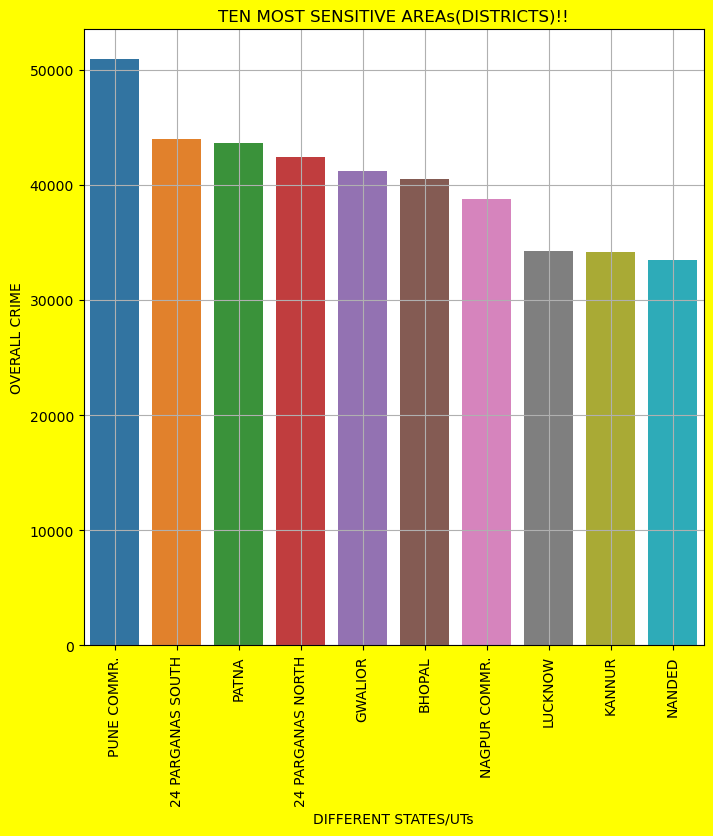

In [193]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.barplot(x=sensitive['DISTRICT'],y=sensitive['OVERALL CRIME'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT STATES/UTs")
plt.title("TEN MOST SENSITIVE AREAs(DISTRICTS)!!")
plt.grid()
plt.show()

### The most top 1 sensitive are in india is pune commercial it has total crime  And this is top sensitive place in india...high no of crime rate is in place
###  This is the sensitive city in india in places rank city with high crime crime in india

# 4.3.1  What is impacting more crimes in sensitive areas?

In [194]:
sensitive_reg=sensitive_regions.reset_index().drop(['index'],axis=1).head(50)

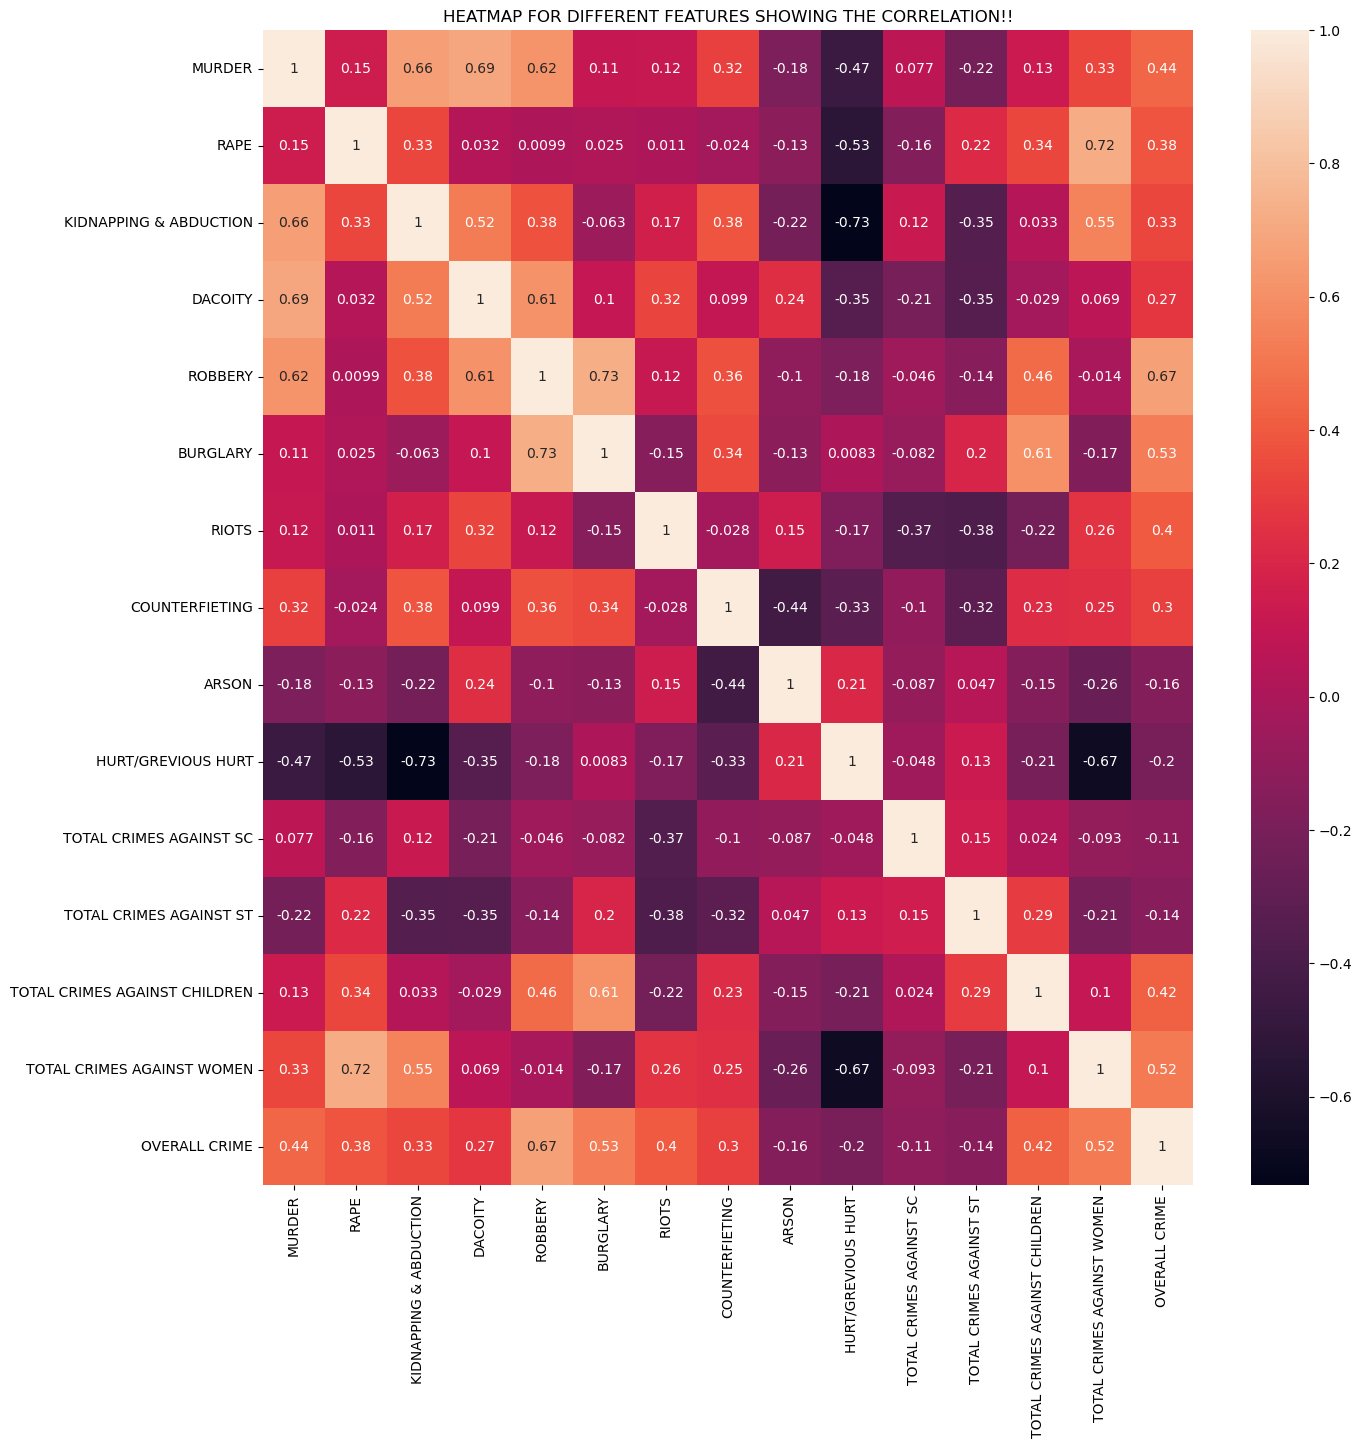

In [196]:
plt.figure(figsize=(15,15))
sns.heatmap(sensitive_reg.iloc[:,2:].corr(),annot=True)
plt.title("HEATMAP FOR DIFFERENT FEATURES SHOWING THE CORRELATION!!")
plt.show()

THE HEATMAP DESCRIBING THE CORRELATION FOR DIFFERENT FEATURES CAN BE SEEN FROM THE ABOVE PLOT!!<BR>


<Figure size 2500x9000 with 0 Axes>

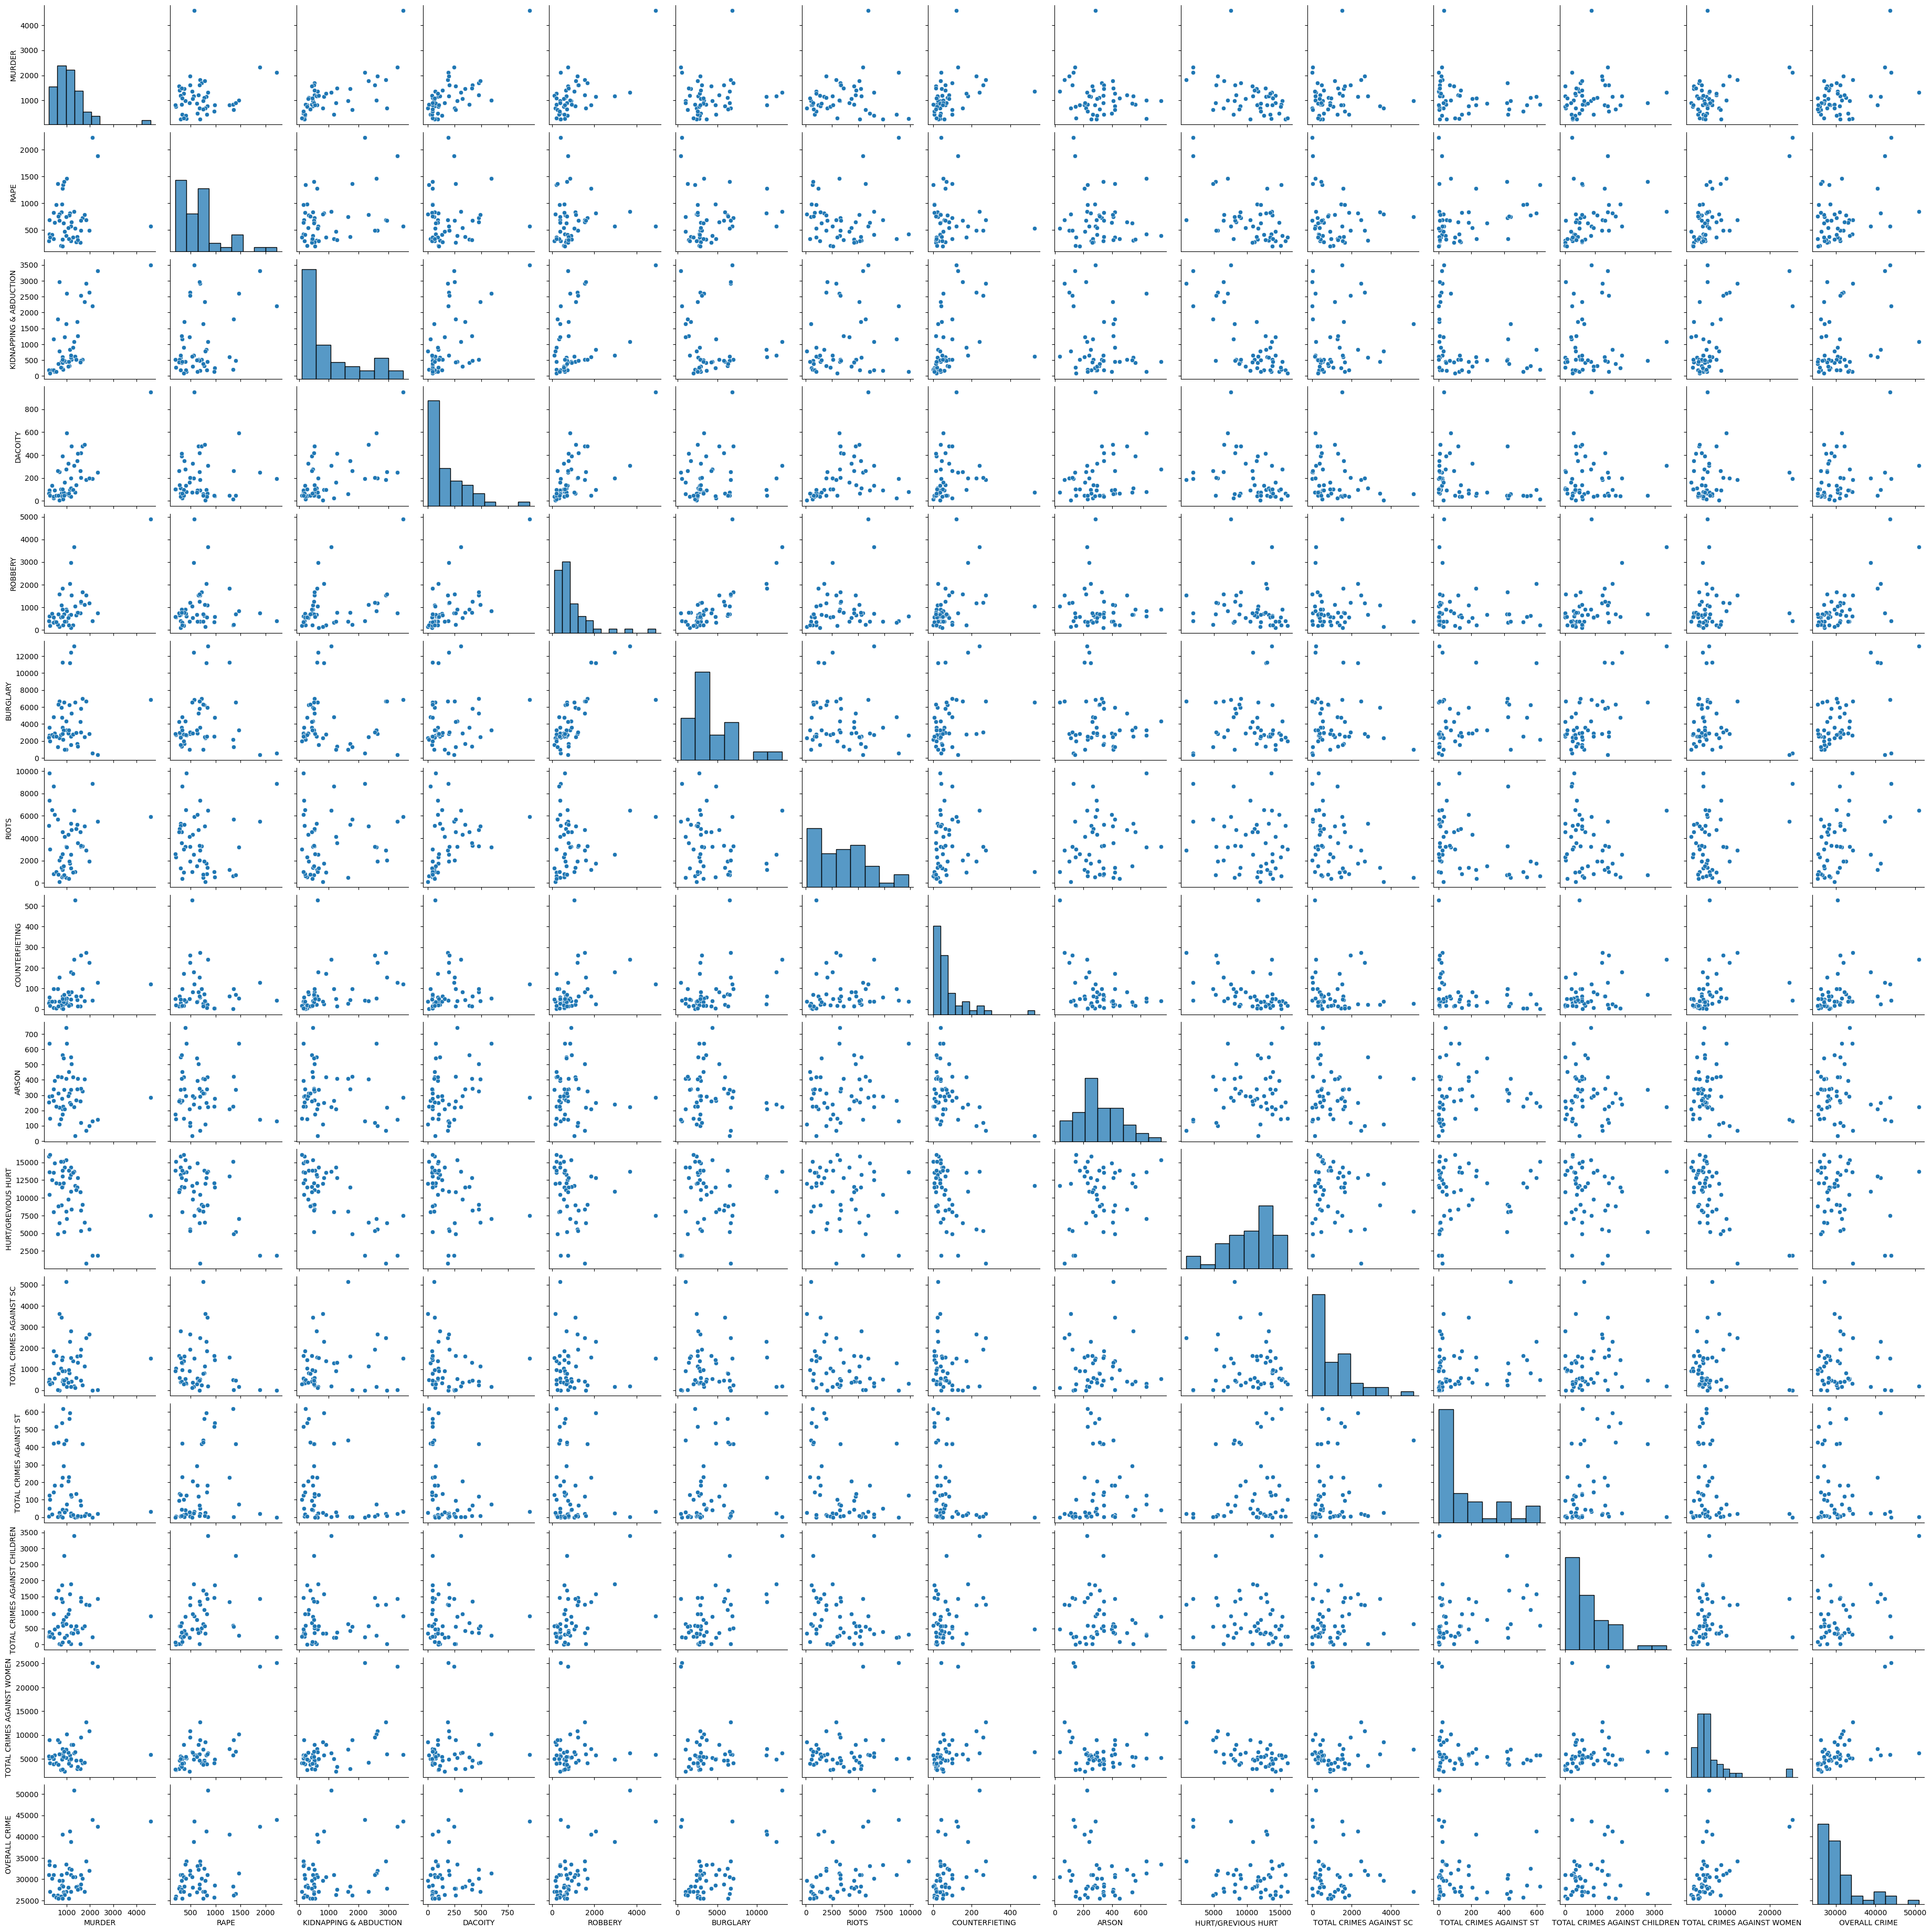

In [195]:
plt.figure(figsize=(25,90))
sns.pairplot(sensitive_reg)
plt.xticks(size=20)
plt.show()

##  4.3.2 What needs to be done to reduce crime.

Reducing crime in India is a complex and multifaceted issue that requires a coordinated effort from various stakeholders, including the government, law enforcement agencies, civil society organizations, and the general public. Here are some measures that can help reduce crime in India:<BR><BR>
Strengthen law enforcement: The government needs to allocate more resources and funds to law enforcement agencies to improve their capacity to prevent and investigate crimes. Police reforms should be implemented to make the force more accountable, efficient, and effective.<BR><BR>
Address socio-economic factors: Poverty, unemployment, and lack of education are significant contributors to crime. The government needs to take measures to address these issues by creating job opportunities, improving access to education, and providing basic amenities like water, electricity, and healthcare.<BR><BR>
Strengthen the justice system: The justice system in India is often slow and inefficient, which can lead to frustration and disillusionment among the public. Steps should be taken to streamline the justice system and make it more responsive to the needs of the people.<BR><BR>
Raise public awareness: People should be made aware of the consequences of crime and the importance of reporting crime. Awareness campaigns should be conducted to educate people about their rights and responsibilities.<BR><BR>
Improve community policing: Community policing can help build trust between the police and the community, leading to better crime prevention and investigation. The police should work closely with the community to identify and address local issues.<BR><BR>
Use technology: Technology can play a significant role in preventing and solving crimes. The government should invest in modernizing the police force with advanced technology like CCTV cameras, drones, and digital forensics.<BR><BR>
Reform the prison system: The prison system in India is overcrowded and inhumane, which can lead to the further radicalization of inmates. The government needs to take steps to improve the conditions in prisons and provide inmates with access to education and vocational training.<BR><BR>

## 4.3.4  Capstone project overall story in your own words. Min 1000 words.

India is a diverse country with a population of over 1.38 billion people, and crime is a significant issue that affects its citizens. According to the  data available from the National Crime Records Bureau (NCRB) for the year 2011, there were a total of 2.27 million reported cases of crime in India in 2011, a decrease of 4.54% from the previous year.

Crimes against women, including rape, sexual harassment, and domestic violence, continue to be a major concern in India. In 2011, there were 2,13,949 reported cases of crimes against women, and 11.04% of these cases were related to rape or sexual assault. Despite the enactment of stricter laws and increased public awareness, crimes against women remain a persistent problem in India.

Crimes against children including rape, kidnapping and abduction ,murder,traffacking,importation of girl are still the leading concerns in India. In 2011, there were 33,049 reported cases of crimes against children, and 21.51% of these cases were related to rape or sexual assault, and record 46.24% of the csaes are recorded of the murder only among differnt crimes against children.Even after various laws and stricter law enforcements  being made to control the crimes against children  a increase  by 254.86% can be seen from the year 2001 to 2011.Madhya Pradesh records the most cases counting to 40,217 over the years and is followed by Uttar Pradesh and Maharastra counting the numbers to 29,969 and 27,845.In the year 2011 33,718 cases were recorded against SC.
 
Involvement of juveniles can also be seen as a serious threat to the society.Often misguided,mishandled the juveniles tends towards to opt the wrong ways. As its easy to influence them stricter laws should be made to overcome this issue.Total of 23,597 cases were recorded in 2001 which then increased to 27,471 in the year 2011.Madhya Pradesh have the most cases recording to 61,939 and manipur being the least in the cases.

Human right violation by the police too offers significant amount of share in total ipc crimes.Year 2009 have the most cases recorded in any year , counting the crimes to 664.There is 82.815% decrease in the cases from the year 2001 to 2011.Chattisgarh have the most cases of human right violation across the states 2001 to 2011.

Its also important to note that those who have the duty of maintaining the law and order in the state i,e the police department have also the cases of getting assaulted by the Rioutous_mob,extremists,in counter insurgency operation,border opeartions and many more.Uttar pradesh recorded 2150 cases from the year 2001 to 2011, Jammu Kashmir also holds the 4 position with the total count of 1142.0 .Almost 5% increase in the cases can be seen from the year 2001 to 2011.In JAMMU & KASHMIR a decrease in the cases of assaults and killing of the police/army personnel acan be seen as the cases in 2001 were 300 which reduced to 50 in 2010 , 83.33 % direct decrease in the cases.

Maharastra, Uttar Pradesh  and Madhya Pradesh had the most cases for DACOITY/ROBBERY/BURGALARY/THEFT combined together with counts being 
Maharastra-7,17,452<BR>
Madhya Pradesh-3,89,927<BR>
UTTAR PRADESH-3,66,166<BR>



Overall, while there has been a increase in the number of reported crimes in India hinting that  there are still significant challenges to be addressed. The government needs to continue its efforts to improve law enforcement, raise public awareness, and address socio-economic factors that contribute to crime.

# Thank You